In [62]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

import copy
import pandas as pd


In [109]:
mol_smiles = "CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5"
# mol_smiles = "C1=CC(=CC(=C1)NC(=O)NC2=CC=CC(=C2)C(=O)NC3=C4C(=CC(=CC4=C(C=C3)S(=O)(=O)O)S(=O)(=O)O)S(=O)(=O)O)C(=O)NC5=C6C(=CC(=CC6=C(C=C5)S(=O)(=O)O)S(=O)(=O)O)S(=O)(=O)O"


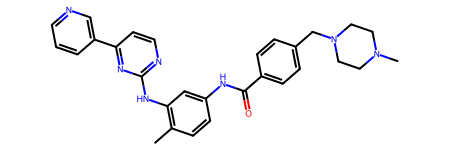

In [110]:
mol = Chem.MolFromSmiles(mol_smiles)
mol

In [111]:
"""# https://github.com/ur-whitelab/exmol/blob/e0d0beaeb6ea410a3c6d566ecd17a8a4b738a6b4/exmol/exmol.py#L186
def _load_smarts(path, rank_cutoff=500):
    # we have a rank cut for SMARTS that match too often
    from rdkit.Chem import MolFromSmarts
    smarts = {}
    with open(path) as f:
        for line in f.readlines():
            if line[0] == "#":
                continue
            i1 = line.find(":")
            i2 = line.find(":", i1 + 1)
            m = MolFromSmarts(line[i2 + 1 :].strip())
            rank = int(line[i1 + 1 : i2])
            if rank > rank_cutoff:
                continue
            name = line[:i1]
            if m is None:
                print(f"Could not parse SMARTS: {line}")
                print(line[i2:].strip())
            smarts[name] = (m, rank)
    return smarts

smarts=_load_smarts("smarts.txt", 500)"""

'# https://github.com/ur-whitelab/exmol/blob/e0d0beaeb6ea410a3c6d566ecd17a8a4b738a6b4/exmol/exmol.py#L186\ndef _load_smarts(path, rank_cutoff=500):\n    # we have a rank cut for SMARTS that match too often\n    from rdkit.Chem import MolFromSmarts\n    smarts = {}\n    with open(path) as f:\n        for line in f.readlines():\n            if line[0] == "#":\n                continue\n            i1 = line.find(":")\n            i2 = line.find(":", i1 + 1)\n            m = MolFromSmarts(line[i2 + 1 :].strip())\n            rank = int(line[i1 + 1 : i2])\n            if rank > rank_cutoff:\n                continue\n            name = line[:i1]\n            if m is None:\n                print(f"Could not parse SMARTS: {line}")\n                print(line[i2:].strip())\n            smarts[name] = (m, rank)\n    return smarts\n\nsmarts=_load_smarts("smarts.txt", 500)'

In [112]:
def _load_smarts_pd(path):
    sl = []
    with open(path) as f:
        for line in f.readlines():
            if line[0] == "#":
                continue
            line=line.strip()
            name, rank, smarts = line.split(":",maxsplit=2)               
            s={
                "name": name.replace("_"," "),
                "rank": rank,
                "smol": Chem.MolFromSmarts(smarts),
                "smarts": smarts
            }
            if s["smol"] is None:
                print(f"Could not parse SMARTS: {line}")
                print(line)
            sl.append(s)
    return pd.DataFrame(sl)

smarts_df = _load_smarts_pd("smarts.txt")

In [113]:
smarts_df

,name,rank,smol,smarts
0,Primary carbon,309,<rdkit.Chem.rdchem.Mol object at 0x14c93b8b0>,[CX4H3][#6]
1,Secondary carbon,312,<rdkit.Chem.rdchem.Mol object at 0x14c93b990>,[CX4H2]([#6])[#6]
2,Tertiary carbon,304,<rdkit.Chem.rdchem.Mol object at 0x14c93b920>,[CX4H1]([#6])([#6])[#6]
3,Quaternary carbon,299,<rdkit.Chem.rdchem.Mol object at 0x14b5eb610>,[CX4]([#6])([#6])([#6])[#6]
4,Alkane,314,<rdkit.Chem.rdchem.Mol object at 0x14b5eb450>,[CX4][CX4]
...,...,...,...,...
318,ester,260,<rdkit.Chem.rdchem.Mol object at 0x14c953b50>,[O;H0]C(=O)[C;H2]
319,cyclohexane,250,<rdkit.Chem.rdchem.Mol object at 0x14c953bc0>,C1CCCCC1
320,cyclopentane,240,<rdkit.Chem.rdchem.Mol object at 0x14c953c30>,C1CCCC1
321,cyclopropane,230,<rdkit.Chem.rdchem.Mol object at 0x14c953ca0>,C1CC1


Found 8 rotatable bonds


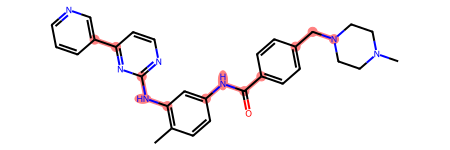

In [114]:
rotatable_smarts='[!$(*#*)&!D1]-!@[!$(*#*)&!D1]'

mrot = copy.deepcopy(mol)
rot=mrot.GetSubstructMatches(Chem.MolFromSmarts(rotatable_smarts))
print(f"Found {len(rot)} rotatable bonds")
mrot

In [115]:
"""mois = []
for name,v in smarts.items():
    pat, rank = v
    m=copy.deepcopy(mol)
    _=m.GetSubstructMatches(pat)
    if _:
        m.SetProp("Legend", f"{name} (n={len(_)})")
        mois.append(m)"""

'mois = []\nfor name,v in smarts.items():\n    pat, rank = v\n    m=copy.deepcopy(mol)\n    _=m.GetSubstructMatches(pat)\n    if _:\n        m.SetProp("Legend", f"{name} (n={len(_)})")\n        mois.append(m)'

In [116]:
mois = []
for i,v in smarts_df.iterrows():
    m=copy.deepcopy(mol)
    smol=Chem.MolFromSmarts(v.smarts)
    _=m.GetSubstructMatches(smol)
    if _:
        m.SetProp("Legend", f"{v['name']} (n={len(_)})")
        mois.append(m)

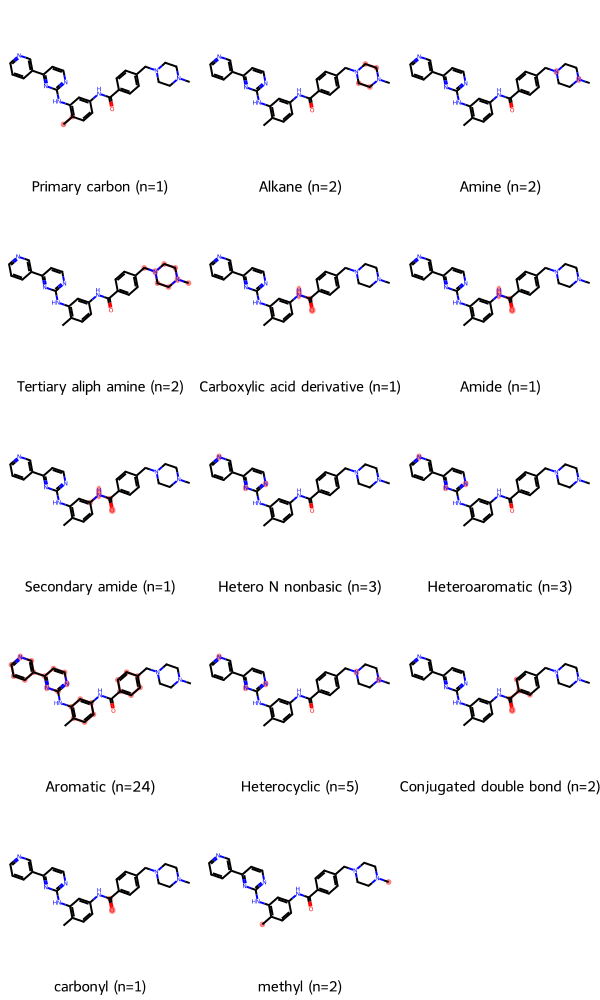

In [120]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mois, 
                     molsPerRow=3,
                    legends=[mol.GetProp("Legend") for mol in mois],
                    highlightAtomLists=[mol.__sssAtoms for mol in mois]
                    )

In [126]:
mois[1].__sssAtoms

[18, 19, 21, 22]

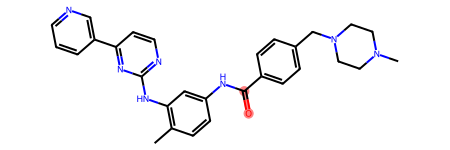

In [141]:
mol.GetSubstructMatches(smarts_df.loc[smarts_df["name"]=="carbonyl","smol"].iloc[0])
mol

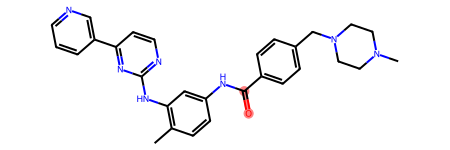

In [143]:
mois[12]